In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# 데이터 확인 및 전처리

In [2]:
kpop = pd.read_csv("kpopidolsv3.csv")

In [3]:
kpop.head()

,Stage Name,Full Name,Korean Name,K Stage Name,Date of Birth,Group,Debut,Company,Country,Second Country,Height,Weight,Birthplace,Other Group,Former Group,Gender
0,2Soul,Kim Younghoon,김영훈,이솔,10/09/1997,7 O'clock,26/08/2014,Jungle,South Korea,NaN,172.0,55.0,NaN,NaN,NaN,M
1,A.M,Seong Hyunwoo,성현우,에이엠,31/12/1996,Limitless,9/07/2019,ONO,South Korea,NaN,181.0,62.0,NaN,NaN,NaN,M
2,Ace,Jang Wooyoung,장우영,에이스,28/08/1992,VAV,31/10/2015,A team,South Korea,NaN,177.0,63.0,NaN,NaN,NaN,M
3,Aeji,Kwon Aeji,권애지,애지,25/10/1999,Hash Tag,11/10/2017,LUK,South Korea,NaN,163.0,NaN,Daegu,NaN,NaN,F
4,AhIn,Lee Ahin,이아인,아인,27/09/1999,MOMOLAND,9/11/2016,Double Kick,South Korea,NaN,160.0,44.0,Wonju,NaN,NaN,F


In [4]:
kpop.shape

(1778, 16)

In [5]:
kpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stage Name      1778 non-null   object 
 1   Full Name       1769 non-null   object 
 2   Korean Name     1768 non-null   object 
 3   K Stage Name    1777 non-null   object 
 4   Date of Birth   1776 non-null   object 
 5   Group           1632 non-null   object 
 6   Debut           1632 non-null   object 
 7   Company         1632 non-null   object 
 8   Country         1778 non-null   object 
 9   Second Country  62 non-null     object 
 10  Height          836 non-null    float64
 11  Weight          566 non-null    float64
 12  Birthplace      834 non-null    object 
 13  Other Group     140 non-null    object 
 14  Former Group    264 non-null    object 
 15  Gender          1778 non-null   object 
dtypes: float64(2), object(14)
memory usage: 222.4+ KB


In [6]:
kpop.isnull().sum()

Stage Name           0
Full Name            9
Korean Name         10
K Stage Name         1
Date of Birth        2
Group              146
Debut              146
Company            146
Country              0
Second Country    1716
Height             942
Weight            1212
Birthplace         944
Other Group       1638
Former Group      1514
Gender               0
dtype: int64

In [7]:
kpop.columns

Index(['Stage Name', 'Full Name', 'Korean Name', 'K Stage Name',
       'Date of Birth', 'Group', 'Debut', 'Company', 'Country',
       'Second Country', 'Height', 'Weight', 'Birthplace', 'Other Group',
       'Former Group', 'Gender'],
      dtype='object')

In [8]:
# 분석에 관련없는 데이터 제거 : Full Name, Korean Name, K Stage Name, Second Country, Birthplace, Other Group, Former Group
kpop = kpop.drop(["Full Name", "Korean Name", "K Stage Name", "Second Country", "Birthplace", "Other Group", "Former Group"], axis = 1)
kpop.head()

,Stage Name,Date of Birth,Group,Debut,Company,Country,Height,Weight,Gender
0,2Soul,10/09/1997,7 O'clock,26/08/2014,Jungle,South Korea,172.0,55.0,M
1,A.M,31/12/1996,Limitless,9/07/2019,ONO,South Korea,181.0,62.0,M
2,Ace,28/08/1992,VAV,31/10/2015,A team,South Korea,177.0,63.0,M
3,Aeji,25/10/1999,Hash Tag,11/10/2017,LUK,South Korea,163.0,NaN,F
4,AhIn,27/09/1999,MOMOLAND,9/11/2016,Double Kick,South Korea,160.0,44.0,F


In [9]:
kpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stage Name     1778 non-null   object 
 1   Date of Birth  1776 non-null   object 
 2   Group          1632 non-null   object 
 3   Debut          1632 non-null   object 
 4   Company        1632 non-null   object 
 5   Country        1778 non-null   object 
 6   Height         836 non-null    float64
 7   Weight         566 non-null    float64
 8   Gender         1778 non-null   object 
dtypes: float64(2), object(7)
memory usage: 125.1+ KB


In [10]:
# Date of Birth, Debut 결측치 제거
kpop = kpop.dropna(subset = 'Date of Birth')
kpop = kpop.dropna(subset = 'Debut')

In [11]:
kpop.isnull().sum()

Stage Name          0
Date of Birth       0
Group               0
Debut               0
Company             0
Country             0
Height            856
Weight           1108
Gender              0
dtype: int64

In [12]:
kpop.shape

(1630, 9)

In [13]:
a = kpop[kpop["Debut"]=="0/01/1900"]
a.shape

(7, 9)

In [14]:
# Debut 가 0/01/1900 으로 넣어져있는 값을 결측치처리
kpop["Debut"] = kpop["Debut"].replace('0/01/1900', pd.NA)

In [15]:
kpop.isnull().sum()

Stage Name          0
Date of Birth       0
Group               0
Debut               7
Company             0
Country             0
Height            856
Weight           1108
Gender              0
dtype: int64

In [16]:
# Debut 결측치 제거
kpop = kpop.dropna(subset = 'Debut')

In [17]:
kpop.isnull().sum()

Stage Name          0
Date of Birth       0
Group               0
Debut               0
Company             0
Country             0
Height            849
Weight           1101
Gender              0
dtype: int64

In [18]:
kpop.shape

(1623, 9)

In [19]:
# Date of Birth, Debut 날짜형으로 변환
kpop["Date of Birth"] = pd.to_datetime(kpop["Date of Birth"], format = "%d/%m/%Y")
kpop["Debut"] = pd.to_datetime(kpop["Debut"], format = "%d/%m/%Y")

In [20]:
kpop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623 entries, 0 to 1777
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Stage Name     1623 non-null   object        
 1   Date of Birth  1623 non-null   datetime64[ns]
 2   Group          1623 non-null   object        
 3   Debut          1623 non-null   datetime64[ns]
 4   Company        1623 non-null   object        
 5   Country        1623 non-null   object        
 6   Height         774 non-null    float64       
 7   Weight         522 non-null    float64       
 8   Gender         1623 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 126.8+ KB


In [21]:
# Age, Debut Age 컬럼 추가
kpop["Age"] = (dt.datetime.now() - kpop["Date of Birth"]).astype("<m8[Y]")
kpop["Debut Age"] = (kpop["Debut"] - kpop["Date of Birth"]).astype("<m8[Y]")

In [22]:
kpop["Age"].describe()

count    1623.000000
mean       25.844116
std         4.741373
min        15.000000
25%        22.000000
50%        25.000000
75%        29.000000
max        44.000000
Name: Age, dtype: float64

In [23]:
kpop["Debut Age"].describe()

count    1623.000000
mean       18.902649
std         3.460417
min        -3.000000
25%        17.000000
50%        19.000000
75%        21.000000
max        33.000000
Name: Debut Age, dtype: float64

In [24]:
# Debut Age <= 10 데이터 제거
kpop = kpop[kpop["Debut Age"]>10]

In [25]:
kpop["Debut Age"].describe()

count    1596.000000
mean       19.150376
std         2.882431
min        11.000000
25%        17.000000
50%        19.000000
75%        21.000000
max        33.000000
Name: Debut Age, dtype: float64

In [26]:
kpop.head()

,Stage Name,Date of Birth,Group,Debut,Company,Country,Height,Weight,Gender,Age,Debut Age
0,2Soul,1997-09-10,7 O'clock,2014-08-26,Jungle,South Korea,172.0,55.0,M,26.0,16.0
1,A.M,1996-12-31,Limitless,2019-07-09,ONO,South Korea,181.0,62.0,M,27.0,22.0
2,Ace,1992-08-28,VAV,2015-10-31,A team,South Korea,177.0,63.0,M,31.0,23.0
3,Aeji,1999-10-25,Hash Tag,2017-10-11,LUK,South Korea,163.0,NaN,F,24.0,17.0
4,AhIn,1999-09-27,MOMOLAND,2016-11-09,Double Kick,South Korea,160.0,44.0,F,24.0,17.0


In [27]:
kpop.shape

(1596, 11)

## 여자/남자 비율 시각화

<Axes: xlabel='Gender', ylabel='count'>

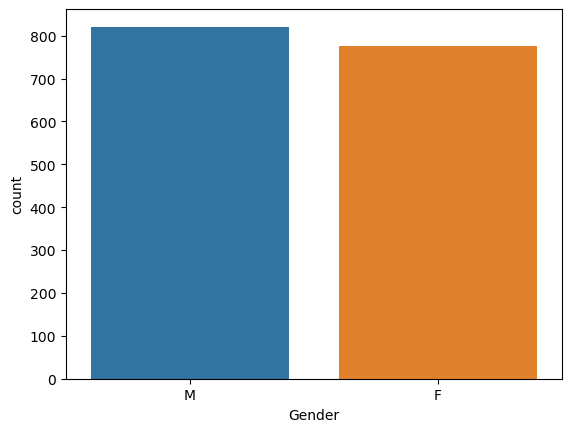

In [28]:
sns.countplot(x="Gender", data = kpop)

- 남자의 수가 여자의 수보다 미세하게 많음

## 여자/남자 나이 시각화

In [29]:
male = kpop[kpop["Gender"] == "M"]
female = kpop[kpop["Gender"] == "F"]

In [30]:
print(int(male["Age"].mean()))
print(int(female["Age"].mean()))

26
25


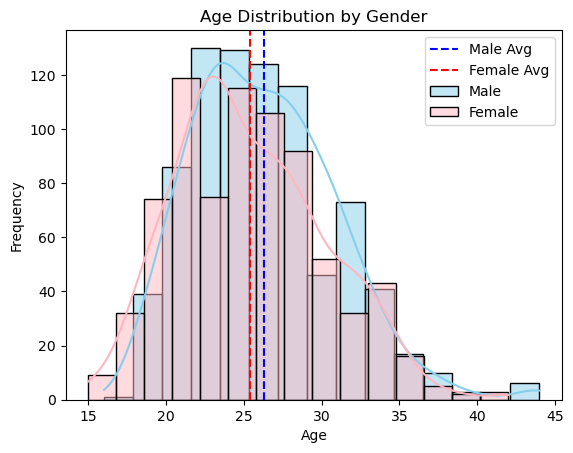

In [31]:
male = kpop[kpop["Gender"] == "M"]
female = kpop[kpop["Gender"] == "F"]

sns.histplot(data=male, x='Age', kde=True, color='skyblue', bins=15, alpha=0.5, label='Male')
sns.histplot(data=female, x='Age', kde=True, color='lightpink', bins=15, alpha=0.5, label='Female')
plt.axvline(x=male['Age'].mean(), color='blue', linestyle='dashed', linewidth=1.5, label='Male Avg')
plt.axvline(x=female['Age'].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Female Avg')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender')
plt.legend()
plt.show()

- 대체적으로 비슷하지만 남성의 나이가 여성의 나이보다 많음
- 남성 평균나이 : 약 26세
- 여성 평균나이 : 약 25세

## 여자/남자 데뷔나이 시각화

In [32]:
print(int(male["Debut Age"].mean()))
print(int(female["Debut Age"].mean()))

19
18


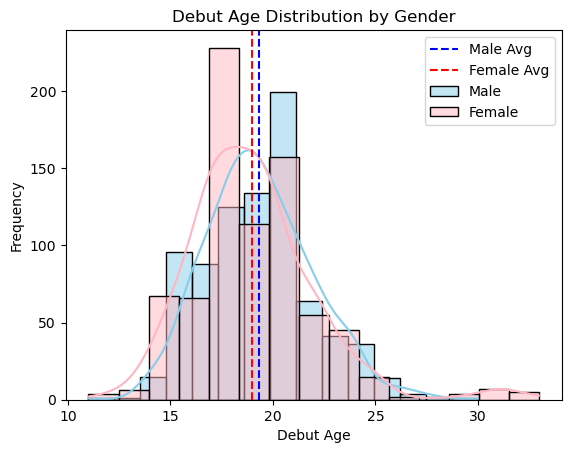

In [33]:
sns.histplot(data=male, x='Debut Age', kde=True, color='skyblue', bins=15, alpha=0.5, label='Male')
sns.histplot(data=female, x='Debut Age', kde=True, color='lightpink', bins=15, alpha=0.5, label='Female')
plt.axvline(x=male['Debut Age'].mean(), color='blue', linestyle='dashed', linewidth=1.5, label='Male Avg')
plt.axvline(x=female['Debut Age'].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Female Avg')
plt.xlabel('Debut Age')
plt.ylabel('Frequency')
plt.title('Debut Age Distribution by Gender')
plt.legend()
plt.show()

- 대체적으로 비슷하지만 남성의 데뷔나이가 여성의 데뷔나이보다 많음
- 남자 평균 데뷔나이 : 약 19세
- 여자 평균 데뷔나이 : 약 18세

## 여자아이돌 키 / 몸무게 시각화

In [34]:
female["Height"].describe()

count    399.000000
mean     164.528822
std        4.170192
min      150.000000
25%      162.000000
50%      165.000000
75%      167.000000
max      175.000000
Name: Height, dtype: float64

In [35]:
female["Weight"].describe()

count    211.000000
mean      51.369668
std       24.180784
min       38.000000
25%       44.000000
50%       47.000000
75%       49.000000
max      170.000000
Name: Weight, dtype: float64

In [36]:
# 몸무게 100 이상 제거
female = female[female["Weight"] <100]

In [37]:
female["Weight"].describe()

count    202.000000
mean      46.316832
std        2.985640
min       38.000000
25%       44.000000
50%       46.000000
75%       48.000000
max       55.000000
Name: Weight, dtype: float64

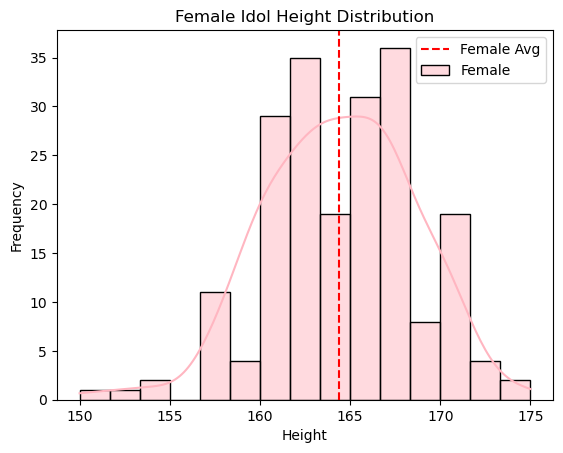

In [38]:
sns.histplot(data=female, x="Height", kde=True, color="lightpink", bins=15, alpha=0.5, label="Female")
plt.axvline(x=female["Height"].mean(), color="red", linestyle="dashed", linewidth=1.5, label="Female Avg")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Female Idol Height Distribution")
plt.legend()
plt.show()

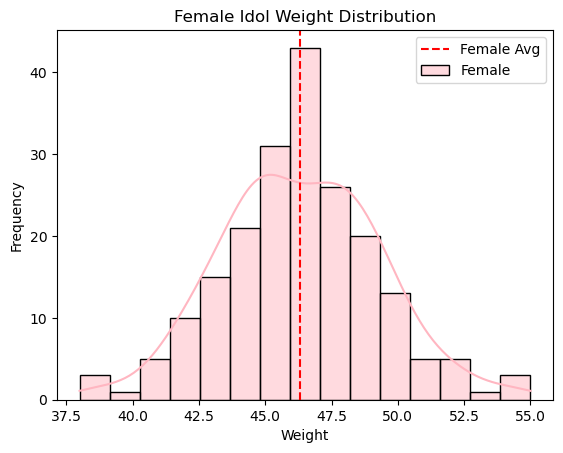

In [39]:
sns.histplot(data=female, x="Weight", kde=True, color="lightpink", bins=15, alpha=0.5, label="Female")
plt.axvline(x=female["Weight"].mean(), color="red", linestyle="dashed", linewidth=1.5, label="Female Avg")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Female Idol Weight Distribution")
plt.legend()
plt.show()

- 키
    - 160대에 가장 많이 분포되어있음
    - 평균 : 약 164.5cm
- 몸무게
    - 40kg 중후반대에 가장 많이 분포되어있음
    - 평균 : 약 46.3kg

## 남자아이돌 키 / 몸무게 시각화

In [40]:
male["Height"].describe()

count    364.000000
mean     177.662088
std        4.241159
min      165.000000
25%      175.000000
50%      178.000000
75%      180.000000
max      190.000000
Name: Height, dtype: float64

In [41]:
male["Weight"].describe()

count    311.000000
mean      61.707395
std        8.023830
min       48.000000
25%       58.000000
50%       61.000000
75%       64.000000
max      170.000000
Name: Weight, dtype: float64

In [42]:
# 몸무게 150 이상 제거
male = male[male["Weight"] <150]

In [43]:
male["Weight"].describe()

count    310.000000
mean      61.358065
std        5.149309
min       48.000000
25%       58.000000
50%       61.000000
75%       64.000000
max       90.000000
Name: Weight, dtype: float64

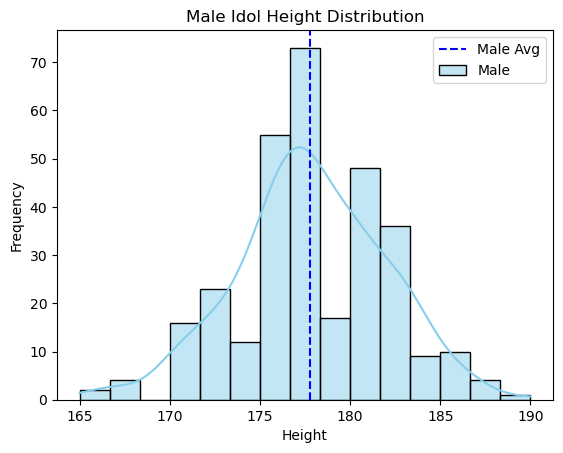

In [44]:
sns.histplot(data=male, x='Height', kde=True, color='skyblue', bins=15, alpha=0.5, label='Male')
plt.axvline(x=male['Height'].mean(), color="blue", linestyle='dashed', linewidth=1.5, label='Male Avg')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Male Idol Height Distribution')
plt.legend()
plt.show()

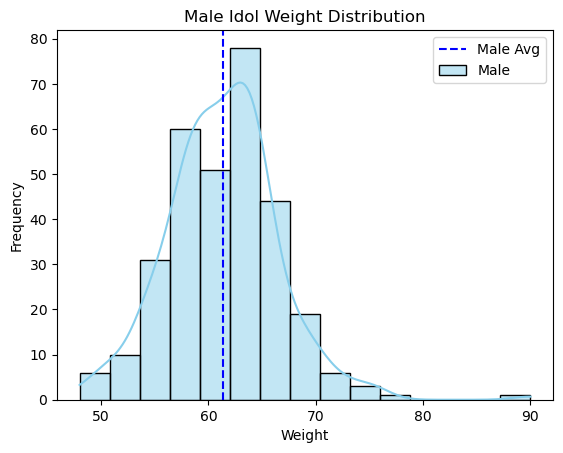

In [45]:
sns.histplot(data=male, x="Weight", kde=True, color="skyblue", bins=15, alpha=0.5, label="Male")
plt.axvline(x=male["Weight"].mean(), color="blue", linestyle="dashed", linewidth=1.5, label="Male Avg")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Male Idol Weight Distribution")
plt.legend()
plt.show()

- 키
    - 170 중후반대에 가장 많이 분포되어있음
    - 평균 : 약 177.7cm
- 몸무게
    - 50kg 후반 ~ 60kg 초반대에 가장 많이 분포되어있음
    - 평균 : 약 61.4kg

## 국적 시각화

In [46]:
kpop["Country"].unique()

array(['South Korea', 'Germany', 'USA', 'Hong Kong', 'China', 'India',
       'Japan', 'Thailand', 'Australia', 'Philippines', 'Taiwan',
       'Indonesia', 'Belgium', 'Vietnam', 'Canada', 'Malaysia',
       'New Zealand', 'Brazil', 'Russia', 'Macau'], dtype=object)

In [47]:
kpop["Country"].value_counts()

South Korea    1441
Japan            57
China            38
USA              17
Thailand         10
Taiwan            8
Hong Kong         4
Australia         4
Canada            4
Indonesia         2
Vietnam           2
India             1
Philippines       1
Germany           1
Belgium           1
Malaysia          1
New Zealand       1
Brazil            1
Russia            1
Macau             1
Name: Country, dtype: int64

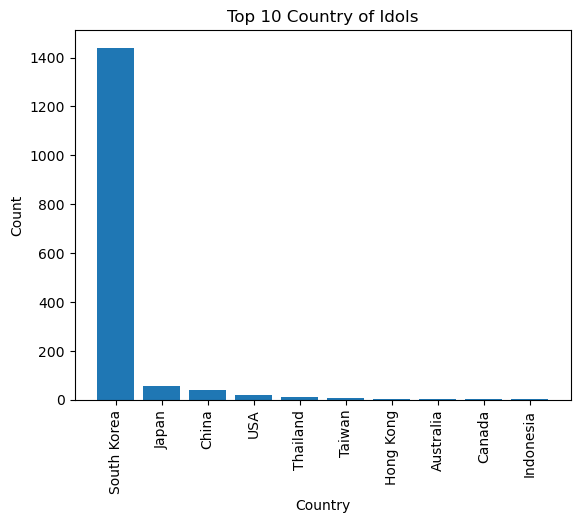

In [48]:
# 상위 10개국 시각화
country = kpop["Country"].value_counts().head(10)

plt.bar(country.index, country.values)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 10 Country of Idols")
plt.xticks(rotation=90)
plt.show()

- 한국 -> 일본 -> 중국 -> 미국 순으로 많음

## 연도별 데뷔 수

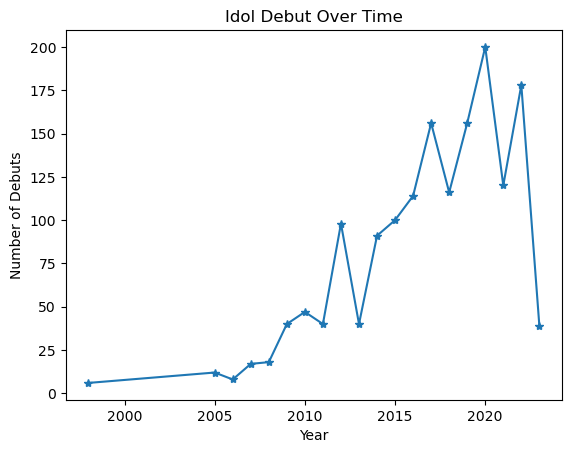

In [49]:
debut = kpop["Debut"].dt.year.value_counts().sort_index()

plt.plot(debut.index, debut.values, marker="*")
plt.xlabel("Year")
plt.ylabel("Number of Debuts")
plt.title("Idol Debut Over Time")
plt.show()

- 2015년 ~ 2020년에 가장 많은 데뷔가 있었음

## 그룹별 인원 시각화

In [50]:
kpop["Group"].unique()

array(["7 O'clock", 'Limitless', 'VAV', 'Hash Tag', 'MOMOLAND',
       'Favorite', 'BOTOPASS', 'Queenz Eye', 'Dal Shabet', 'P.O.P',
       'Everglow', 'MAJORS', 'DRIPPIN', 'Hello Venus', 'TRACER',
       'CRAVITY', 'f(x)', 'EPEX', 'Shinhwa', 'GWSN', 'VARSITY', 'ILY:1',
       'FIFTY FIFTY', 'Pink Fantasy', 'AREAL', 'Tahiti', 'X:IN', 'MIXX',
       'Oh My Girl', "NU'EST", 'Kingdom', 'Treasure', "Ladies' Code",
       'NATURE', 'Bling Bling', 'Saturday', '14U', 'Lovelyz', 'Hinapia',
       'NMIXX', 'XUM', "E'LAST", 'EXO', 'Kep1er', 'JUST B', 'GOT7',
       'Stray Kids', 'XEED', 'Block B', '1TEAM', 'DUSTIN', 'Cignature',
       'B.I.G', 'TXT', 'Lapillus', 'MCND', 'Hot Blood Youth', 'BAE173',
       'MONT', 'UP10TION', 'Topp Dogg', 'Pungdeng-E', 'KARD', 'KEEMBO',
       'iKON', 'CLASS:y', 'SIGNAL', '2NE1', 'Apink', 'Golden Child',
       'RedSquare', 'WJSN', 'Dreamnote', 'Cherry Bullet', 'SISTAR', 'CIX',
       'A.C.E', 'VICTON', 'Teen Top', 'Fiestar', 'CROSS GENE', 'N.Flying',
       'Bon

In [51]:
kpop["Group"].value_counts()

NCT          20
14U          14
Seventeen    13
tripleS      12
LOONA        12
             ..
15&           2
KARD          2
JBJ95         1
Good Day      1
mimiimiii     1
Name: Group, Length: 282, dtype: int64

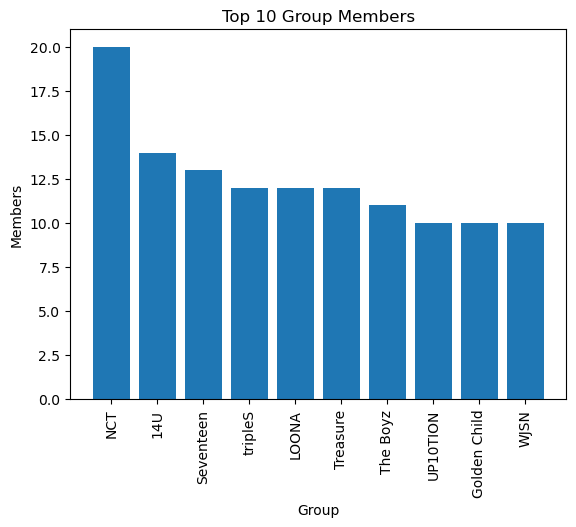

In [52]:
# 상위 10개 그룹 시각화
group = kpop["Group"].value_counts()
group10 = kpop["Group"].value_counts().head(10)

plt.bar(group10.index, group10.values)
plt.xlabel("Group")
plt.ylabel("Members")
plt.title("Top 10 Group Members")
plt.xticks(rotation=90)
plt.show()

In [53]:
group.values.mean()

5.659574468085107

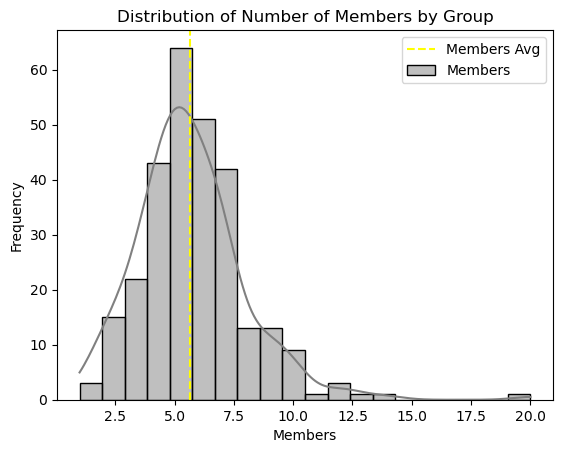

In [54]:
sns.histplot(data=group, x=group.values, kde=True, color="gray", bins=20, alpha=0.5, label="Members")
plt.axvline(x=group.values.mean(), color="yellow", linestyle="dashed", linewidth=1.5, label="Members Avg")
plt.xlabel("Members")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Members by Group")
plt.legend()
plt.show()

- NCT -> 14U -> Seventeen 순으로 멤버가 많음
- 평균 : 약 5.7명

## 회사 시각화

In [55]:
kpop["Company"].unique()

array(['Jungle', 'ONO', 'A team', 'LUK', 'Double Kick', 'Astory',
       'WKS ENE', 'Big Mountain', 'Happy Face', 'DWM', 'Yuehua', 'ANS',
       'Woollim', 'Fantagio', 'Gleamedia', 'Starship', 'SM', 'C9',
       'SM| Good| Shinhwa', 'Kiwi Pop', 'GKC', 'FC ENM', 'ATTRAKT',
       'My Doll', 'JZ Factory', 'J-line', 'Escrow', 'Chiko', 'WM',
       'Pledis', 'GF', 'YG', 'Polaris', 'n.CH', 'Major9', 'SD', 'BG',
       'Alseulbit', 'JYP', 'A100', 'E Entertainment', 'WakeOne',
       'Bluedot', 'Nature Space', 'KQ', 'LiveWorks', 'LPA', 'GH',
       'Big Hit', 'MLD', 'TOP Media', 'FNC', 'PocketDol', 'DOMA', 'DSP',
       'ARA-LINE', 'Universal', 'J-Star', 'Plan A', 'About', 'iME',
       'Beat', 'LOEN', 'Amuse', 'Maroo', 'RBW', 'IOK Company', 'H2',
       'FENT', 'KM', 'Source', 'Dreamus', 'SAITEINMENT', 'MBK',
       'Off The Record', 'MODHAUS', 'KD', 'CHITWN', 'Cube', 'Choeun',
       'All-S', 'Chrome', 'Blockberry', 'J-FLO', 'Wuzo', 'TS', 'Brave',
       'Brand New', 'OUI', 'SidusHQ', 'ALLA

In [56]:
kpop["Company"].value_counts()

SM          58
JYP         56
FNC         52
Starship    44
Woollim     37
            ..
ARA-LINE     2
Rolling      2
AO           2
Hunus        1
Midas        1
Name: Company, Length: 177, dtype: int64

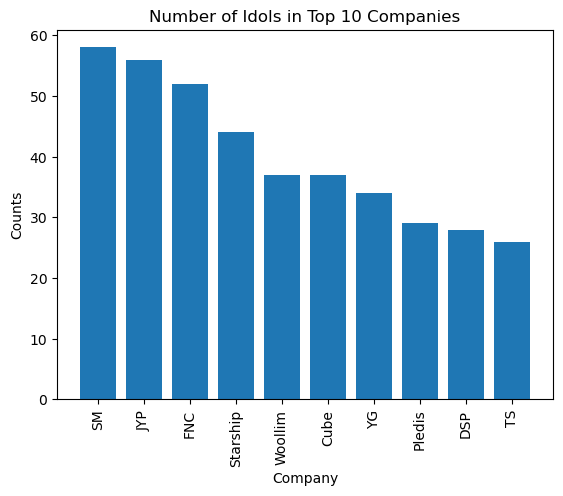

In [57]:
# 상위10개 회사 시각화
company = kpop["Company"].value_counts().head(10)

plt.bar(company.index, company.values)
plt.xlabel("Company")
plt.ylabel("Counts")
plt.title("Number of Idols in Top 10 Companies")
plt.xticks(rotation=90)
plt.show()

In [58]:
company.mean()

40.1

- SM -> JYP -> FNC 순서로 많음
- 평균 : 약 40.1명

# 상위 3개 회사 연도별 데뷔년도 시각화

## SM

In [59]:
sm = kpop[kpop["Company"]=="SM"]

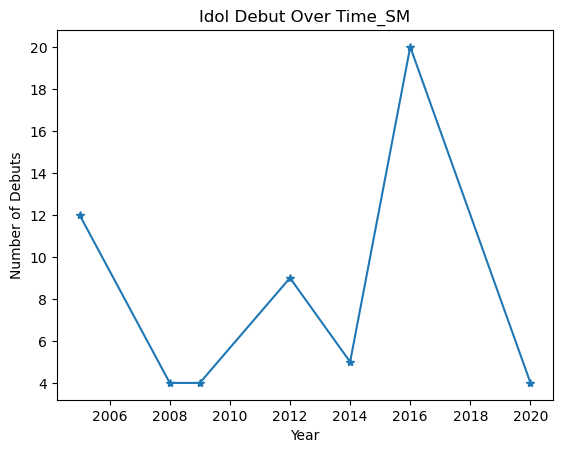

In [60]:
sm_debut = sm["Debut"].dt.year.value_counts().sort_index()

plt.plot(sm_debut.index, sm_debut.values, marker="*")
plt.xlabel("Year")
plt.ylabel("Number of Debuts")
plt.title("Idol Debut Over Time_SM")
plt.show()

- 평균 약 2.7년 주기로 데뷔
- 2016년도에 가장 많은 데뷔를 함 -> NCT

## JYP

In [61]:
jyp = kpop[kpop["Company"]=="JYP"]

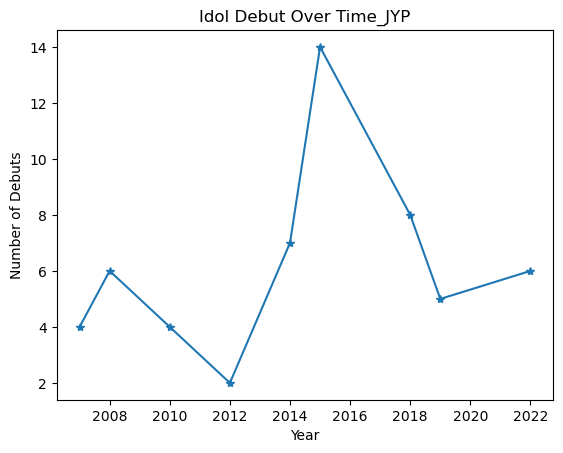

In [62]:
jyp_debut = jyp["Debut"].dt.year.value_counts().sort_index()

plt.plot(jyp_debut.index, jyp_debut.values, marker="*")
plt.xlabel("Year")
plt.ylabel("Number of Debuts")
plt.title("Idol Debut Over Time_JYP")
plt.show()

- 평균 약 2년 주기로 데뷔
- 2015년도에 가장 많은 데뷔를 함 -> 데이식스, 트와이스

## FNC

In [63]:
fnc = kpop[kpop["Company"]=="FNC"]

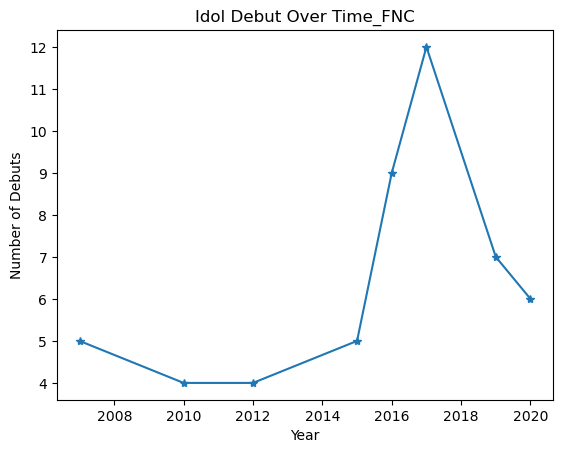

In [64]:
fnc_debut = fnc["Debut"].dt.year.value_counts().sort_index()

plt.plot(fnc_debut.index, fnc_debut.values, marker="*")
plt.xlabel("Year")
plt.ylabel("Number of Debuts")
plt.title("Idol Debut Over Time_FNC")
plt.show()

- 평균 약1.6년 주기로 데뷔
- 2017년도에 가장 많은 데뷔를 함 -> 핫이슈, 열혈남아